In [1]:
#Import libraries
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Premare columns with possible goals
c = []
d = []

for a in range(11):
    for b in range(11):
        c.append(a)
        d.append(b)

In [3]:
#Prepare data to the table
raw_data = {"Home goals":c, "Away goals":d}

In [4]:
#Create table
data = pd.DataFrame(raw_data)
data["all goals"] = data["Home goals"] + data["Away goals"]
data

,Home goals,Away goals,all goals
0,0,0,0
1,0,1,1
2,0,2,2
3,0,3,3
4,0,4,4
...,...,...,...
116,10,6,16
117,10,7,17
118,10,8,18
119,10,9,19


In [5]:
#Poisson distribution
def pois(home, away):
    return poisson.cdf(home, away)

In [6]:
#Type expected goals - home and away team togother
exp_goals = int(input("Type expected goals: "))

Type expected goals: 7


In [7]:
pois(data["Home goals"], exp_goals)

array([0.00091188, 0.00091188, 0.00091188, 0.00091188, 0.00091188,
       0.00091188, 0.00091188, 0.00091188, 0.00091188, 0.00091188,
       0.00091188, 0.00729506, 0.00729506, 0.00729506, 0.00729506,
       0.00729506, 0.00729506, 0.00729506, 0.00729506, 0.00729506,
       0.00729506, 0.00729506, 0.02963616, 0.02963616, 0.02963616,
       0.02963616, 0.02963616, 0.02963616, 0.02963616, 0.02963616,
       0.02963616, 0.02963616, 0.02963616, 0.08176542, 0.08176542,
       0.08176542, 0.08176542, 0.08176542, 0.08176542, 0.08176542,
       0.08176542, 0.08176542, 0.08176542, 0.08176542, 0.17299161,
       0.17299161, 0.17299161, 0.17299161, 0.17299161, 0.17299161,
       0.17299161, 0.17299161, 0.17299161, 0.17299161, 0.17299161,
       0.30070828, 0.30070828, 0.30070828, 0.30070828, 0.30070828,
       0.30070828, 0.30070828, 0.30070828, 0.30070828, 0.30070828,
       0.30070828, 0.44971106, 0.44971106, 0.44971106, 0.44971106,
       0.44971106, 0.44971106, 0.44971106, 0.44971106, 0.44971

In [8]:
#Prepare probability to the column
tes = []
for i in pois(data["all goals"], exp_goals):
    tes.append(round(i, 2))

In [9]:
data["pct"] = tes

In [10]:
data

,Home goals,Away goals,all goals,pct
0,0,0,0,0.00
1,0,1,1,0.01
2,0,2,2,0.03
3,0,3,3,0.08
4,0,4,4,0.17
...,...,...,...,...
116,10,6,16,1.00
117,10,7,17,1.00
118,10,8,18,1.00
119,10,9,19,1.00


In [11]:
#Plot the pivot table
final_probab = data.pivot_table(index="Home goals", columns="Away goals", values="pct")
final_probab

Away goals,0,1,2,3,4,5,6,7,8,9,10
Home goals,,,,,,,,,,,
0,0.00,0.01,0.03,0.08,0.17,0.30,0.45,0.60,0.73,0.83,0.90
1,0.01,0.03,0.08,0.17,0.30,0.45,0.60,0.73,0.83,0.90,0.95
2,0.03,0.08,0.17,0.30,0.45,0.60,0.73,0.83,0.90,0.95,0.97
3,0.08,0.17,0.30,0.45,0.60,0.73,0.83,0.90,0.95,0.97,0.99
4,0.17,0.30,0.45,0.60,0.73,0.83,0.90,0.95,0.97,0.99,0.99
5,0.30,0.45,0.60,0.73,0.83,0.90,0.95,0.97,0.99,0.99,1.00
6,0.45,0.60,0.73,0.83,0.90,0.95,0.97,0.99,0.99,1.00,1.00
7,0.60,0.73,0.83,0.90,0.95,0.97,0.99,0.99,1.00,1.00,1.00
8,0.73,0.83,0.90,0.95,0.97,0.99,0.99,1.00,1.00,1.00,1.00


In [12]:
#Confiigure size of the picture
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

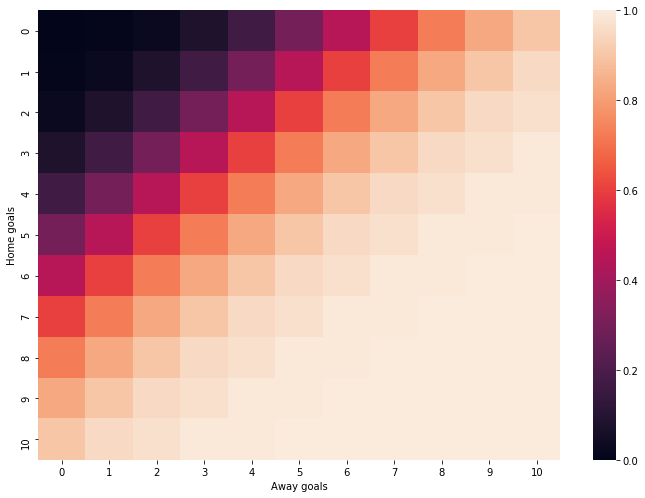

In [13]:
#Data in heat map
sns.heatmap(final_probab)

In [14]:
#odds
round(1/final_probab,2)

Away goals,0,1,2,3,4,5,6,7,8,9,10
Home goals,,,,,,,,,,,
0,inf,100.00,33.33,12.50,5.88,3.33,2.22,1.67,1.37,1.20,1.11
1,100.00,33.33,12.50,5.88,3.33,2.22,1.67,1.37,1.20,1.11,1.05
2,33.33,12.50,5.88,3.33,2.22,1.67,1.37,1.20,1.11,1.05,1.03
3,12.50,5.88,3.33,2.22,1.67,1.37,1.20,1.11,1.05,1.03,1.01
4,5.88,3.33,2.22,1.67,1.37,1.20,1.11,1.05,1.03,1.01,1.01
5,3.33,2.22,1.67,1.37,1.20,1.11,1.05,1.03,1.01,1.01,1.00
6,2.22,1.67,1.37,1.20,1.11,1.05,1.03,1.01,1.01,1.00,1.00
7,1.67,1.37,1.20,1.11,1.05,1.03,1.01,1.01,1.00,1.00,1.00
8,1.37,1.20,1.11,1.05,1.03,1.01,1.01,1.00,1.00,1.00,1.00
